In [14]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from utils import check_and_make_dir
from scipy.optimize import curve_fit

# Glued tree graph

In [15]:
DATA_DIR = "resource_data"
TASK_DIR = "glued_tree"

CURR_DIR = DATA_DIR
check_and_make_dir(CURR_DIR)
CURR_DIR = join(CURR_DIR, TASK_DIR)
check_and_make_dir(CURR_DIR)

The glued trees graph with $n$ vertices has $m=3n/2-1$ edges. Thus each term in the Hamiltonian has norm $O(n)$. Thus, for first-order we can bound the Trotter steps by $O(n^2)$, and for second-order we can bound it by $O(n^{3/2})$.

In [16]:
trotter_method = "second_order"

resource_estimation_binary = np.load(join(CURR_DIR, f"std_binary_{trotter_method}.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']

resource_estimation_one_hot = np.load(join(CURR_DIR, f"one_hot_{trotter_method}.npz"))
N_vals_one_hot = resource_estimation_one_hot["N_vals_one_hot"]
one_hot_trotter_steps = resource_estimation_one_hot['one_hot_trotter_steps']
one_hot_two_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_two_qubit_gate_count_per_trotter_step']

resource_estimation_one_hot_bound = np.load(join(CURR_DIR, f"one_hot_{trotter_method}_bound.npz"))
N_vals_one_hot_bound = resource_estimation_one_hot_bound["N_vals_one_hot_bound"]
one_hot_trotter_steps_bound = resource_estimation_one_hot_bound['one_hot_trotter_steps_bound']

Quantum walk on glued tree
Extrapolated curve: f(x) =  1.922 * x ^  0.500


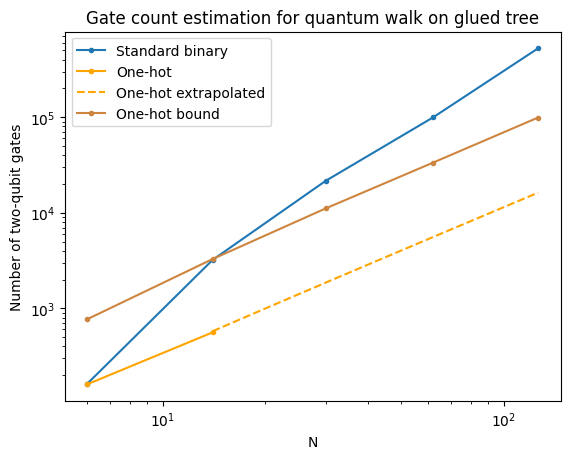

In [17]:
from scipy.optimize import curve_fit

# Extrapolation for one_hot
if trotter_method == "first_order":
    alpha_one_hot = 1
else:
    alpha_one_hot = 1/2

def func(x, c):
    return c * x ** alpha_one_hot

# alpha_one_hot = np.polyfit(np.log(N_vals_one_hot_bound), np.log(one_hot_trotter_steps_bound), deg=1)[0]

c = curve_fit(func, N_vals_one_hot, one_hot_trotter_steps)[0][0]
print(f"Quantum walk on glued tree")
print(f"Extrapolated curve: f(x) = {c: 0.3f} * x ^ {alpha_one_hot : 0.3f}")

N_vals_one_hot_extrapolated = np.arange(N_vals_one_hot[-1], N_vals_binary[-1]+1)
one_hot_trotter_steps_extrapolated = func(N_vals_one_hot_extrapolated, c)

if trotter_method == "first_order" or trotter_method == "randomized_first_order":
    one_hot_two_qubit_gate_count_per_trotter_step_extrapolated = 2 * (3 * N_vals_one_hot_extrapolated / 2 - 1)
    one_hot_two_qubit_gate_count_per_trotter_step_bound = 2 * (3 * N_vals_one_hot_bound / 2 - 1)
elif trotter_method == "second_order":
    one_hot_two_qubit_gate_count_per_trotter_step_extrapolated = 4 * (3 * N_vals_one_hot_extrapolated / 2 - 1)
    one_hot_two_qubit_gate_count_per_trotter_step_bound = 4 * (3 * N_vals_one_hot_bound / 2 - 1)


plt.plot(N_vals_binary, binary_trotter_steps * binary_two_qubit_gate_count_per_trotter_step, '-o', label="Standard binary", markersize=3)
plt.plot(N_vals_one_hot, one_hot_trotter_steps * one_hot_two_qubit_gate_count_per_trotter_step, '-o', color="orange", label="One-hot", markersize=3)
plt.plot(N_vals_one_hot_extrapolated, one_hot_trotter_steps_extrapolated * one_hot_two_qubit_gate_count_per_trotter_step_extrapolated, '--', color='orange', label="One-hot extrapolated", markersize=1)
plt.plot(N_vals_one_hot_bound, one_hot_trotter_steps_bound * one_hot_two_qubit_gate_count_per_trotter_step_bound, '-o', color="peru", label="One-hot bound", markersize=3)

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel("Number of two-qubit gates")
plt.xlabel("N")
plt.title("Gate count estimation for quantum walk on glued tree")
plt.show()

# Spatial search

2D spatial search

In [18]:
DATA_DIR = "resource_data"
TASK_DIR = "spatial_search_2d"

CURR_DIR = DATA_DIR
check_and_make_dir(CURR_DIR)
CURR_DIR = join(CURR_DIR, TASK_DIR)
check_and_make_dir(CURR_DIR)

dimension = 2

In [19]:
trotter_method = "first_order"

resource_estimation_binary = np.load(join(CURR_DIR, f"std_binary_{trotter_method}.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']

resource_estimation_unary = np.load(join(CURR_DIR, f"unary_{trotter_method}.npz"))
N_vals_unary = resource_estimation_unary["N_vals_unary"]
unary_trotter_steps = resource_estimation_unary['unary_trotter_steps']
unary_two_qubit_gate_count_per_trotter_step = resource_estimation_unary['unary_two_qubit_gate_count_per_trotter_step']

resource_estimation_unary_bound = np.load(join(CURR_DIR, f"unary_{trotter_method}_bound.npz"))
N_vals_unary_bound = resource_estimation_unary_bound["N_vals_unary_bound"]
unary_trotter_steps_bound = resource_estimation_unary_bound['unary_trotter_steps_bound']

resource_estimation_one_hot = np.load(join(CURR_DIR, f"one_hot_{trotter_method}.npz"))
N_vals_one_hot = resource_estimation_one_hot["N_vals_one_hot"]
one_hot_trotter_steps = resource_estimation_one_hot['one_hot_trotter_steps']
one_hot_two_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_two_qubit_gate_count_per_trotter_step']

resource_estimation_one_hot_bound = np.load(join(CURR_DIR, f"one_hot_{trotter_method}_bound.npz"))
N_vals_one_hot_bound = resource_estimation_one_hot_bound["N_vals_one_hot_bound"]
one_hot_trotter_steps_bound = resource_estimation_one_hot_bound['one_hot_trotter_steps_bound']

Quantum walk on spatial search
Extrapolated curve: f(x) =  1.758 * x ^  2.000
Quantum walk on spatial search
Extrapolated curve: f(x) =  8.771 * x ^  1.000


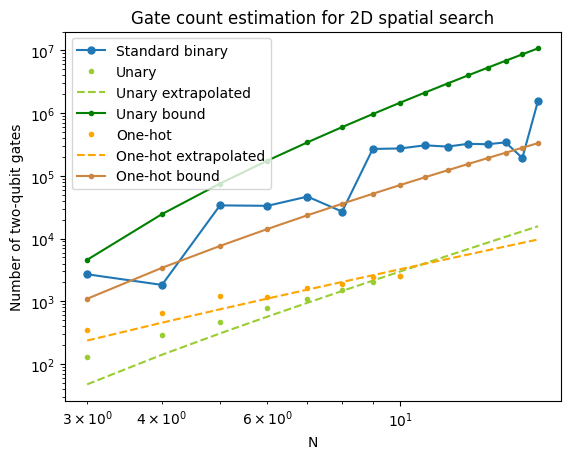

In [22]:

# Extrapolation for unary
if trotter_method == "first_order":
    alpha_unary = 2
else:
    alpha_unary = 3/2

# alpha_unary = np.polyfit(np.log(N_vals_unary_bound), np.log(unary_trotter_steps_bound), deg=1)[0]

def func(x, c):
    return c * x ** alpha_unary

c = curve_fit(func, N_vals_unary, unary_trotter_steps)[0][0]
print(f"Quantum walk on spatial search")
print(f"Extrapolated curve: f(x) = {c: 0.3f} * x ^ {alpha_unary : 0.3f}")

N_vals_unary_extrapolated = np.arange(N_vals_unary[0], N_vals_binary[-1]+1)
unary_trotter_steps_extrapolated = func(N_vals_unary_extrapolated, c)
if trotter_method == "first_order" or trotter_method == "randomized_first_order":
    unary_two_qubit_gate_count_per_trotter_step_extrapolated = dimension * (N_vals_unary_extrapolated - 2) + 1
    unary_two_qubit_gate_count_per_trotter_step_bound = dimension * (N_vals_unary_bound - 2) + 1
elif trotter_method == "second_order":
    unary_two_qubit_gate_count_per_trotter_step_extrapolated = 2 * dimension * (N_vals_unary_extrapolated - 2) + 1
    unary_two_qubit_gate_count_per_trotter_step_bound = 2 * dimension * (N_vals_unary_bound - 2) + 1
else:
    raise ValueError(f"{trotter_method} not valid")
# Extrapolation for one_hot
if trotter_method == "first_order":
    alpha_one_hot = 1
else:
    alpha_one_hot = 1/2

# alpha_one_hot = np.polyfit(np.log(N_vals_one_hot_bound), np.log(one_hot_trotter_steps_bound), deg=1)[0]

def func(x, c):
    return c * x ** alpha_one_hot

c = curve_fit(func, N_vals_one_hot, one_hot_trotter_steps)[0][0]
print(f"Quantum walk on spatial search")
print(f"Extrapolated curve: f(x) = {c: 0.3f} * x ^ {alpha_one_hot : 0.3f}")

N_vals_one_hot_extrapolated = np.arange(N_vals_one_hot[0], N_vals_binary[-1]+1)
one_hot_trotter_steps_extrapolated = func(N_vals_one_hot_extrapolated, c)
if trotter_method == "first_order" or trotter_method == "randomized_first_order":
    one_hot_two_qubit_gate_count_per_trotter_step_extrapolated = 2 * dimension * (N_vals_one_hot_extrapolated - 1) + 1
    one_hot_two_qubit_gate_count_per_trotter_step_bound = 2 * dimension * (N_vals_one_hot_bound - 1) + 1
elif trotter_method == "second_order":
    one_hot_two_qubit_gate_count_per_trotter_step_extrapolated = 4 * dimension * (N_vals_one_hot_extrapolated - 1) + 1
    one_hot_two_qubit_gate_count_per_trotter_step_bound = 4 * dimension * (N_vals_one_hot_bound - 1) + 1


plt.plot(N_vals_binary, binary_trotter_steps * binary_two_qubit_gate_count_per_trotter_step, '-o', label="Standard binary", markersize=5)
# Plot unary
plt.plot(N_vals_unary, unary_trotter_steps * unary_two_qubit_gate_count_per_trotter_step, 'o', color="yellowgreen", label="Unary", markersize=3)
plt.plot(N_vals_unary_extrapolated, unary_trotter_steps_extrapolated * unary_two_qubit_gate_count_per_trotter_step_extrapolated, '--', color="yellowgreen", label="Unary extrapolated", markersize=1)
plt.plot(N_vals_unary_bound, unary_trotter_steps_bound * unary_two_qubit_gate_count_per_trotter_step_bound, '-o', color="green", label="Unary bound", markersize=3)

# Plot one-hot
plt.plot(N_vals_one_hot, one_hot_trotter_steps * one_hot_two_qubit_gate_count_per_trotter_step, 'o', color="orange", label="One-hot", markersize=3)
plt.plot(N_vals_one_hot_extrapolated, one_hot_trotter_steps_extrapolated * one_hot_two_qubit_gate_count_per_trotter_step_extrapolated, '--', color='orange', label="One-hot extrapolated", markersize=1)
plt.plot(N_vals_one_hot_bound, one_hot_trotter_steps_bound * one_hot_two_qubit_gate_count_per_trotter_step_bound, '-o', color="peru", label="One-hot bound", markersize=3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.ylabel("Number of two-qubit gates")
plt.xlabel("N")
plt.title("Gate count estimation for 2D spatial search")
plt.show()

3D spatial search

In [23]:
DATA_DIR = "resource_data"
TASK_DIR = "spatial_search_3d"

CURR_DIR = DATA_DIR
check_and_make_dir(CURR_DIR)
CURR_DIR = join(CURR_DIR, TASK_DIR)
check_and_make_dir(CURR_DIR)

dimension = 3

In [24]:
trotter_method = "first_order"

resource_estimation_binary = np.load(join(CURR_DIR, f"std_binary_{trotter_method}.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']

resource_estimation_unary = np.load(join(CURR_DIR, f"unary_{trotter_method}.npz"))
N_vals_unary = resource_estimation_unary["N_vals_unary"]
unary_trotter_steps = resource_estimation_unary['unary_trotter_steps']
unary_two_qubit_gate_count_per_trotter_step = resource_estimation_unary['unary_two_qubit_gate_count_per_trotter_step']

resource_estimation_unary_bound = np.load(join(CURR_DIR, f"unary_{trotter_method}_bound.npz"))
N_vals_unary_bound = resource_estimation_unary_bound["N_vals_unary_bound"]
unary_trotter_steps_bound = resource_estimation_unary_bound['unary_trotter_steps_bound']

resource_estimation_one_hot = np.load(join(CURR_DIR, f"one_hot_{trotter_method}.npz"))
N_vals_one_hot = resource_estimation_one_hot["N_vals_one_hot"]
one_hot_trotter_steps = resource_estimation_one_hot['one_hot_trotter_steps']
one_hot_two_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_two_qubit_gate_count_per_trotter_step']

resource_estimation_one_hot_bound = np.load(join(CURR_DIR, f"one_hot_{trotter_method}_bound.npz"))
N_vals_one_hot_bound = resource_estimation_one_hot_bound["N_vals_one_hot_bound"]
one_hot_trotter_steps_bound = resource_estimation_one_hot_bound['one_hot_trotter_steps_bound']

Quantum walk on spatial search
Extrapolated curve: f(x) =  1.816 * x ^  2.000
Quantum walk on spatial search
Extrapolated curve: f(x) =  3.523 * x ^  1.000


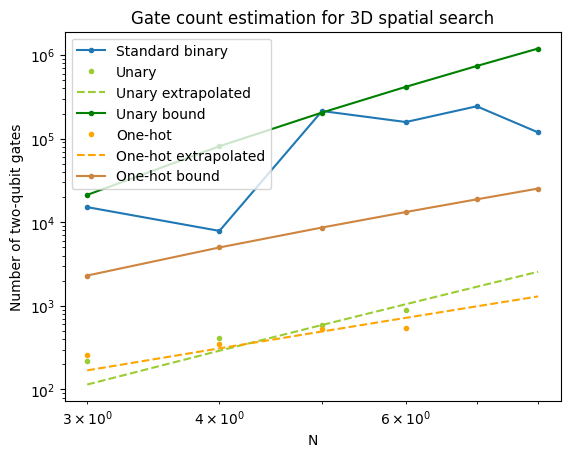

In [25]:

# Extrapolation for unary
if trotter_method == "first_order":
    alpha_unary = 2
else:
    alpha_unary = 3/2

# alpha_unary = np.polyfit(np.log(N_vals_unary_bound), np.log(unary_trotter_steps_bound), deg=1)[0]

def func(x, c):
    return c * x ** alpha_unary

c = curve_fit(func, N_vals_unary, unary_trotter_steps)[0][0]
print(f"Quantum walk on spatial search")
print(f"Extrapolated curve: f(x) = {c: 0.3f} * x ^ {alpha_unary : 0.3f}")

N_vals_unary_extrapolated = np.arange(N_vals_unary[0], N_vals_binary[-1]+1)
unary_trotter_steps_extrapolated = func(N_vals_unary_extrapolated, c)
if trotter_method == "first_order" or trotter_method == "randomized_first_order":
    unary_two_qubit_gate_count_per_trotter_step_extrapolated = dimension * (N_vals_unary_extrapolated - 2) + 4
    unary_two_qubit_gate_count_per_trotter_step_bound = dimension * (N_vals_unary_bound - 2) + 4
elif trotter_method == "second_order":
    unary_two_qubit_gate_count_per_trotter_step_extrapolated = 2 * dimension * (N_vals_unary_extrapolated - 2) + 4
    unary_two_qubit_gate_count_per_trotter_step_bound = 2 * dimension * (N_vals_unary_bound - 2) + 4
else:
    raise ValueError(f"{trotter_method} not valid")
# Extrapolation for one_hot
if trotter_method == "first_order":
    alpha_one_hot = 1
else:
    alpha_one_hot = 1/2

# alpha_one_hot = np.polyfit(np.log(N_vals_one_hot_bound), np.log(one_hot_trotter_steps_bound), deg=1)[0]

def func(x, c):
    return c * x ** alpha_one_hot

c = curve_fit(func, N_vals_one_hot, one_hot_trotter_steps)[0][0]
print(f"Quantum walk on spatial search")
print(f"Extrapolated curve: f(x) = {c: 0.3f} * x ^ {alpha_one_hot : 0.3f}")

N_vals_one_hot_extrapolated = np.arange(N_vals_one_hot[0], N_vals_binary[-1]+1)
one_hot_trotter_steps_extrapolated = func(N_vals_one_hot_extrapolated, c)
if trotter_method == "first_order" or trotter_method == "randomized_first_order":
    one_hot_two_qubit_gate_count_per_trotter_step_extrapolated = 2 * dimension * (N_vals_one_hot_extrapolated - 1) + 4
    one_hot_two_qubit_gate_count_per_trotter_step_bound = 2 * dimension * (N_vals_one_hot_bound - 1) + 4
elif trotter_method == "second_order":
    one_hot_two_qubit_gate_count_per_trotter_step_extrapolated = 4 * dimension * (N_vals_one_hot_extrapolated - 1) + 4
    one_hot_two_qubit_gate_count_per_trotter_step_bound = 4 * dimension * (N_vals_one_hot_bound - 1) + 4


plt.plot(N_vals_binary, binary_trotter_steps * binary_two_qubit_gate_count_per_trotter_step, '-o', label="Standard binary", markersize=3)
# Plot unary
plt.plot(N_vals_unary, unary_trotter_steps * unary_two_qubit_gate_count_per_trotter_step, 'o', color="yellowgreen", label="Unary", markersize=3)
plt.plot(N_vals_unary_extrapolated, unary_trotter_steps_extrapolated * unary_two_qubit_gate_count_per_trotter_step_extrapolated, '--', color="yellowgreen", label="Unary extrapolated", markersize=1)
plt.plot(N_vals_unary_bound, unary_trotter_steps_bound * unary_two_qubit_gate_count_per_trotter_step_bound, '-o', color="green", label="Unary bound", markersize=3)

# Plot one-hot
plt.plot(N_vals_one_hot, one_hot_trotter_steps * one_hot_two_qubit_gate_count_per_trotter_step, 'o', color="orange", label="One-hot", markersize=3)
plt.plot(N_vals_one_hot_extrapolated, one_hot_trotter_steps_extrapolated * one_hot_two_qubit_gate_count_per_trotter_step_extrapolated, '--', color='orange', label="One-hot extrapolated", markersize=1)
plt.plot(N_vals_one_hot_bound, one_hot_trotter_steps_bound * one_hot_two_qubit_gate_count_per_trotter_step_bound, '-o', color="peru", label="One-hot bound", markersize=3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.ylabel("Number of two-qubit gates")
plt.xlabel("N")
plt.title("Gate count estimation for 3D spatial search")
plt.show()

# Real-space simulation

In [26]:
DATA_DIR = "resource_data"
TASK_DIR = "real_space"

CURR_DIR = DATA_DIR
check_and_make_dir(CURR_DIR)
CURR_DIR = join(CURR_DIR, TASK_DIR)
check_and_make_dir(CURR_DIR)

In [27]:
trotter_method = "second_order"

resource_estimation_binary = np.load(join(CURR_DIR, f"std_binary_{trotter_method}.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']

resource_estimation_unary = np.load(join(CURR_DIR, f"unary_{trotter_method}.npz"))
N_vals_unary = resource_estimation_unary["N_vals_unary"]
unary_trotter_steps = resource_estimation_unary['unary_trotter_steps']
unary_two_qubit_gate_count_per_trotter_step = resource_estimation_unary['unary_two_qubit_gate_count_per_trotter_step']

resource_estimation_unary_bound = np.load(join(CURR_DIR, f"unary_{trotter_method}_bound.npz"))
N_vals_unary_bound = resource_estimation_unary_bound["N_vals_unary_bound"]
unary_trotter_steps_bound = resource_estimation_unary_bound['unary_trotter_steps_bound']

resource_estimation_one_hot = np.load(join(CURR_DIR, f"one_hot_{trotter_method}.npz"))
N_vals_one_hot = resource_estimation_one_hot["N_vals_one_hot"]
one_hot_trotter_steps = resource_estimation_one_hot['one_hot_trotter_steps']
one_hot_two_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_two_qubit_gate_count_per_trotter_step']

resource_estimation_one_hot_bound = np.load(join(CURR_DIR, f"one_hot_{trotter_method}_bound.npz"))
N_vals_one_hot_bound = resource_estimation_one_hot_bound["N_vals_one_hot_bound"]
one_hot_trotter_steps_bound = resource_estimation_one_hot_bound['one_hot_trotter_steps_bound']

Real-space simulation
Extrapolated curve: f(x) =  0.977 * x ^  1.010
Extrapolated curve: f(x) =  4.128 * x ^  0.500


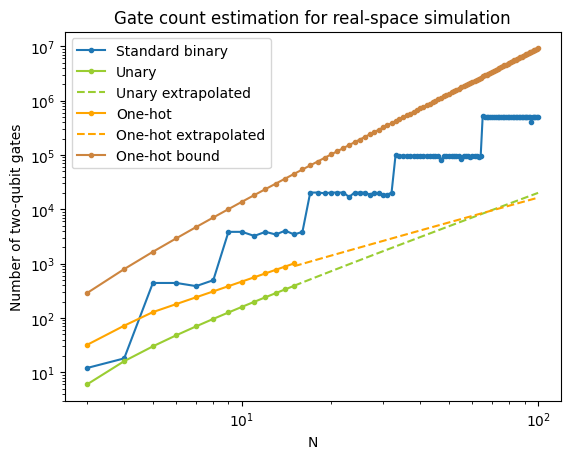

In [28]:
from scipy.optimize import curve_fit

# Extrapolation for unary
if trotter_method == "first_order":
    alpha_unary = 2
else:
    alpha_unary = 3/2

alpha_unary = np.polyfit(np.log(N_vals_unary_bound), np.log(unary_trotter_steps_bound), deg=1)[0]

def func(x, c):
    return c * x ** alpha_unary

c = curve_fit(func, N_vals_unary, unary_trotter_steps)[0][0]
print(f"Real-space simulation")
print(f"Extrapolated curve: f(x) = {c: 0.3f} * x ^ {alpha_unary : 0.3f}")

N_vals_unary_extrapolated = np.arange(N_vals_unary[-1], N_vals_binary[-1]+1)
unary_trotter_steps_extrapolated = func(N_vals_unary_extrapolated, c)

unary_two_qubit_gate_count_per_trotter_step_extrapolated = 2 * (N_vals_unary_extrapolated - 2)
unary_two_qubit_gate_count_per_trotter_step_bound = 2 * (N_vals_unary_bound - 2)

# Extrapolation for one_hot
if trotter_method == "first_order":
    alpha_one_hot = 1
else:
    alpha_one_hot = 1/2
    
# alpha_one_hot = np.polyfit(np.log(N_vals_one_hot_bound), np.log(one_hot_trotter_steps_bound), deg=1)[0]

def func(x, c):
    return c * x ** alpha_one_hot

c = curve_fit(func, N_vals_one_hot, one_hot_trotter_steps)[0][0]
print(f"Extrapolated curve: f(x) = {c: 0.3f} * x ^ {alpha_one_hot : 0.3f}")

N_vals_one_hot_extrapolated = np.arange(N_vals_one_hot[-1], N_vals_binary[-1]+1)
one_hot_trotter_steps_extrapolated = func(N_vals_one_hot_extrapolated, c)
if trotter_method == "first_order" or trotter_method == "randomized_first_order":
    one_hot_two_qubit_gate_count_per_trotter_step_extrapolated = 2 * (N_vals_one_hot_extrapolated - 1)
    one_hot_two_qubit_gate_count_per_trotter_step_bound = 2 * (N_vals_one_hot_bound - 1)
elif trotter_method == "second_order":
    one_hot_two_qubit_gate_count_per_trotter_step_extrapolated = 4 * (N_vals_one_hot_extrapolated - 1)
    one_hot_two_qubit_gate_count_per_trotter_step_bound = 4 * (N_vals_one_hot_bound - 1)

plt.plot(N_vals_binary, binary_trotter_steps * binary_two_qubit_gate_count_per_trotter_step, '-o', label="Standard binary", markersize=3)
# Plot unary
plt.plot(N_vals_unary, unary_trotter_steps * unary_two_qubit_gate_count_per_trotter_step, '-o', color="yellowgreen", label="Unary", markersize=3)
plt.plot(N_vals_unary_extrapolated, unary_trotter_steps_extrapolated * unary_two_qubit_gate_count_per_trotter_step_extrapolated, '--', color="yellowgreen", label="Unary extrapolated", markersize=1)
# plt.plot(N_vals_unary_bound, unary_trotter_steps_bound * unary_two_qubit_gate_count_per_trotter_step_bound, '-o', color="green", label="Unary bound", markersize=3)

# Plot one-hot
plt.plot(N_vals_one_hot, one_hot_trotter_steps * one_hot_two_qubit_gate_count_per_trotter_step, '-o', color="orange", label="One-hot", markersize=3)
plt.plot(N_vals_one_hot_extrapolated, one_hot_trotter_steps_extrapolated * one_hot_two_qubit_gate_count_per_trotter_step_extrapolated, '--', color='orange', label="One-hot extrapolated", markersize=1)
plt.plot(N_vals_one_hot_bound, one_hot_trotter_steps_bound * one_hot_two_qubit_gate_count_per_trotter_step_bound, '-o', color="peru", label="One-hot bound", markersize=3)

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel("Number of two-qubit gates")
plt.xlabel("N")
plt.title("Gate count estimation for real-space simulation")
plt.show()